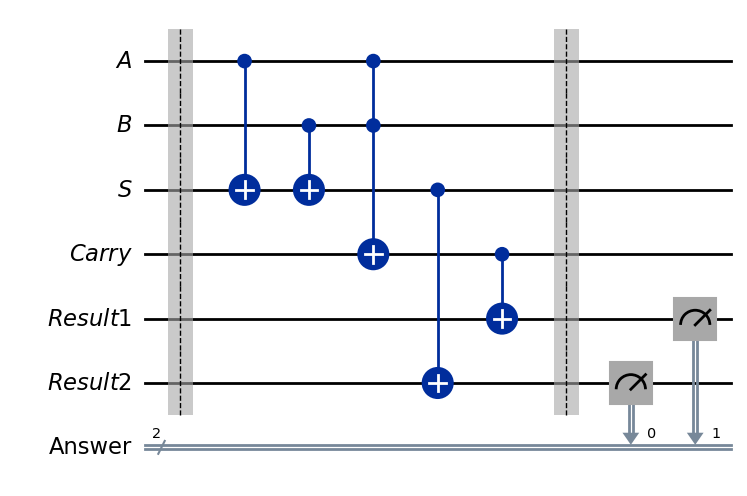

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

A = QuantumRegister(1 , 'A')
B = QuantumRegister(1 , 'B')

S = QuantumRegister(1 , 'S')
Cr = QuantumRegister(1 , 'Carry')

R1 = QuantumRegister(1 , 'Result1')
R2 = QuantumRegister(1 , 'Result2')

Ans = ClassicalRegister(2 , 'Answer')

qc  = QuantumCircuit(A,B,S,Cr,R1,R2,Ans)


########################   Input values as binary   #######################

x = input("Enter a binary number:")
y = input("Enter another binary number:")

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])

############################################################################

qc.barrier()

qc.cx(A,S)
qc.cx(B,S)
qc.ccx(A,B,Cr)
qc.cx(S,R2)
qc.cx(Cr,R1)

qc.barrier()


qc.measure(R2[0],Ans[0])
qc.measure(R1[0],Ans[1])

qc.draw("mpl")


{'00': 1024}


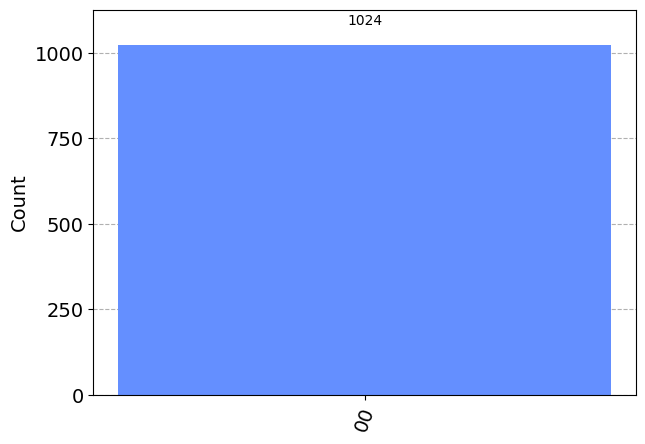

In [2]:
from qiskit_aer import AerSimulator


resultt = AerSimulator().run(qc).result()
stats = resultt.get_counts()

print(stats)

from qiskit.visualization import plot_histogram

plot_histogram(stats)